# 이미지 인식 - 딥 러닝
## MNIST 사례

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [27]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

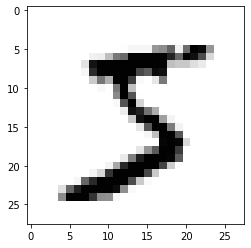

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [30]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [48]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [50]:
X_train.shape

(60000, 784)

In [51]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [52]:
Y_class_train[0]

5

In [63]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [64]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [66]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [74]:
# 모델 프레임 설정
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [75]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [76]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [77]:
modelpath = MODEL_DIR + "mnist{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [78]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=500, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

#history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
#                    epochs=30, batch_size=200, verbose=0, 
#                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 1.15874, saving model to ./model/mnist01-1.1587.hdf5

Epoch 00002: val_loss improved from 1.15874 to 0.64851, saving model to ./model/mnist02-0.6485.hdf5

Epoch 00003: val_loss improved from 0.64851 to 0.47832, saving model to ./model/mnist03-0.4783.hdf5

Epoch 00004: val_loss improved from 0.47832 to 0.40220, saving model to ./model/mnist04-0.4022.hdf5

Epoch 00005: val_loss improved from 0.40220 to 0.36084, saving model to ./model/mnist05-0.3608.hdf5

Epoch 00006: val_loss improved from 0.36084 to 0.33518, saving model to ./model/mnist06-0.3352.hdf5

Epoch 00007: val_loss improved from 0.33518 to 0.31799, saving model to ./model/mnist07-0.3180.hdf5

Epoch 00008: val_loss improved from 0.31799 to 0.30417, saving model to ./model/mnist08-0.3042.hdf5

Epoch 00009: val_loss improved from 0.30417 to 0.29440, saving model to ./model/mnist09-0.2944.hdf5

Epoch 00010: val_loss improved from 0.29440 to 0.28474, saving model to ./model/mnist10-0.2847


Epoch 00086: val_loss did not improve from 0.09729

Epoch 00087: val_loss improved from 0.09729 to 0.09711, saving model to ./model/mnist87-0.0971.hdf5

Epoch 00088: val_loss improved from 0.09711 to 0.09588, saving model to ./model/mnist88-0.0959.hdf5

Epoch 00089: val_loss did not improve from 0.09588

Epoch 00090: val_loss improved from 0.09588 to 0.09506, saving model to ./model/mnist90-0.0951.hdf5

Epoch 00091: val_loss improved from 0.09506 to 0.09448, saving model to ./model/mnist91-0.0945.hdf5

Epoch 00092: val_loss improved from 0.09448 to 0.09337, saving model to ./model/mnist92-0.0934.hdf5

Epoch 00093: val_loss did not improve from 0.09337

Epoch 00094: val_loss improved from 0.09337 to 0.09273, saving model to ./model/mnist94-0.0927.hdf5

Epoch 00095: val_loss improved from 0.09273 to 0.09164, saving model to ./model/mnist95-0.0916.hdf5

Epoch 00096: val_loss did not improve from 0.09164

Epoch 00097: val_loss improved from 0.09164 to 0.09101, saving model to ./model/mnis

In [72]:
from tensorflow.keras.models import load_model
del model
model = load_model('./model/mnist100-0.0888.hdf5')

In [73]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=2)[1]))

10000/10000 - 0s - loss: 0.0852 - accuracy: 0.9729

 Test Accuracy: 0.9729


In [46]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

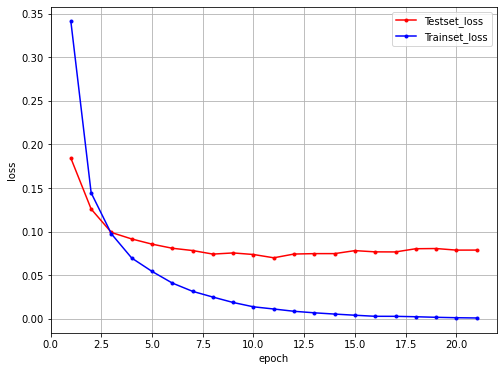

In [47]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 결론: Best Model은 Epoch 12, 정확도는 98.15%